# `eReef` Direct Access and Use Example

**Author**: Leo Li

This notebook demonstrates how to access a public dataset from the RIMReP collection using `zarr`. We will use the [AIMS - eReefs Aggregations of Hydrodynamic Model Outputs (4km Daily)](https://research.csiro.au/ereefs/models/models-about/models-hydrodynamics/) dataset as an example.  
  
We will also include examples of how to make simple calculations to plot maps and timeseries.

In [30]:
# Loading and manipulating gridded multidimensional data
import xarray as xr
# Accessing S3 buckets
import s3fs

## 1. Connecting to S3 bucket and loading dataset

In [31]:
# Path to zarr files
zarr_path = "s3://rimrep-data-public-development/aims-ereefs-agg-hydrodynamic-4km-daily/data.zarr/"

# Connection to public S3 bucket - No credentials needed
fs = s3fs.S3FileSystem(anon=True)

# Loading zarr file
data = xr.open_dataset(s3fs.S3Map(zarr_path, s3=fs), engine="zarr")

# Checking result
data

<xarray.Dataset>
Dimensions:      (time: 4787, latitude: 723, longitude: 491, k: 17)
Coordinates:
  * latitude     (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude    (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time         (time) datetime64[ns] 2010-08-31T14:00:00 ... 2023-10-08T14:...
    zc           (k) float64 ...
Dimensions without coordinates: k
Data variables:
    eta          (time, latitude, longitude) float32 ...
    mean_cur     (time, k, latitude, longitude) float32 ...
    mean_wspeed  (time, latitude, longitude) float32 ...
    salt         (time, k, latitude, longitude) float32 ...
    temp         (time, k, latitude, longitude) float32 ...
    u            (time, k, latitude, longitude) float32 ...
    v            (time, k, latitude, longitude) float32 ...
    wspeed_u     (time, latitude, longitude) float32 ...
    wspeed_v     (time, latitude, longitude) float32 ...
Attributes: (12/23)
    Conventions:                   CF-1.0
    Parameter_File_Revision:       $Revision: 1753 $
    Run_ID:                        2.1
    Run_code:                      GBR4 Hydro|G0.00|H2.1|S0.00|B0.00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2023-10-13T06:40:10+10:00
    ...                            ...
    paramhead:                     GBR 4km resolution grid
    prefix_list_puv__:             https://w3id.org/env/puv#
    prefix_list_qudt__:            http://qudt.org/vocab/unit/
    technical_guide_link:          https://eatlas.org.au/pydio/public/aims-er...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 dai...

In [32]:
# Check data size in GB 
f"Data size: {data.nbytes / 1e9} GB"


'Data size: 604.96917894 GB'

As an `ARCO` (Analysis Ready Cloud Optimized) format, ZARR allows us to access hundreds of GB (or TB) data in seconds `without downloading them anywhere, anytime and on any device`.

Even though the following dataset of [AIMS - eReefs Aggregations of Hydrodynamic Model Outputs (1km Daily)](https://research.csiro.au/ereefs/models/models-about/models-hydrodynamics/) with higher resolutions has 12 Terabytes, we can access it within seconds as well.

In [33]:
# Path to zarr files
zarr_path = "s3://rimrep-data-public-development/aims-ereefs-agg-hydrodynamic-1km-daily/data.zarr/"

# Connection to public S3 bucket - No credentials needed
fs = s3fs.S3FileSystem(anon=True)

# Loading zarr file
data_1km = xr.open_dataset(s3fs.S3Map(zarr_path, s3=fs), engine="zarr")

# Check data size in TB (Terabytes)
f"Data size: {data_1km.nbytes / 1e12} TB"

'Data size: 12.301155749192 TB'

We could have a brief exploration on the dataset of [AIMS - eReefs Aggregations of Hydrodynamic Model Outputs (4km Daily)](https://research.csiro.au/ereefs/models/models-about/models-hydrodynamics/) by simply calling data. If you click the triangle icon, file icon or cylinder icon in cell outputs, you can see more details about the variables or coordinates of the dataset.

In [34]:
data 

<xarray.Dataset>
Dimensions:      (time: 4787, latitude: 723, longitude: 491, k: 17)
Coordinates:
  * latitude     (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude    (longitude) float64 142.2 142.2 142.2 ... 156.8 156.8 156.9
  * time         (time) datetime64[ns] 2010-08-31T14:00:00 ... 2023-10-08T14:...
    zc           (k) float64 ...
Dimensions without coordinates: k
Data variables:
    eta          (time, latitude, longitude) float32 ...
    mean_cur     (time, k, latitude, longitude) float32 ...
    mean_wspeed  (time, latitude, longitude) float32 ...
    salt         (time, k, latitude, longitude) float32 ...
    temp         (time, k, latitude, longitude) float32 ...
    u            (time, k, latitude, longitude) float32 ...
    v            (time, k, latitude, longitude) float32 ...
    wspeed_u     (time, latitude, longitude) float32 ...
    wspeed_v     (time, latitude, longitude) float32 ...
Attributes: (12/23)
    Conventions:                   CF-1.0
    Parameter_File_Revision:       $Revision: 1753 $
    Run_ID:                        2.1
    Run_code:                      GBR4 Hydro|G0.00|H2.1|S0.00|B0.00
    _CoordSysBuilder:              ucar.nc2.dataset.conv.CF1Convention
    aims_ncaggregate_buildDate:    2023-10-13T06:40:10+10:00
    ...                            ...
    paramhead:                     GBR 4km resolution grid
    prefix_list_puv__:             https://w3id.org/env/puv#
    prefix_list_qudt__:            http://qudt.org/vocab/unit/
    technical_guide_link:          https://eatlas.org.au/pydio/public/aims-er...
    technical_guide_publish_date:  2020-08-18
    title:                         eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 dai...

We can see that the above dataset has four dimensions: `latitude` , `longitude` `time` and depth (`zc`). The 4 km model starts in August 2010. There are nine variables in the dataset: `temp`, `salt`, `mean_cur`, `mean_wspeed` and so on.

We can also get more information about each variable included in the dataset by calling variables as shown below.

In [35]:
data.variables

Frozen({'eta': <xarray.Variable (time: 4787, latitude: 723, longitude: 491)>
[1699351491 values with dtype=float32]
Attributes:
    aggregation:            Daily
    long_name:              Surface elevation
    medium_id:              http://environment.data.gov.au/def/feature/ocean
    positive:               up
    puv__parameter:         https://vocab.nerc.ac.uk/collection/P01/current/A...
    scaledQuantityKind_id:  http://environment.data.gov.au/def/property/sea_s...
    short_name:             eta
    standard_name:          sea_surface_height_above_sea_level
    substanceOrTaxon_id:    http://environment.data.gov.au/def/feature/ocean_...
    unit_id:                http://qudt.org/vocab/unit#Meter
    units:                  metre, 'latitude': <xarray.IndexVariable 'latitude' (latitude: 723)>
array([-28.696022, -28.666022, -28.636022, ...,  -7.096022,  -7.066022,
        -7.036022])
Attributes:
    _CoordinateAxisType:  Lat
    coordinate_type:      latitude
    long_name:     

We can specific one variable by calling their attributes as shown below.

In [36]:
data.mean_cur.attrs

{'aggregation': 'mean_speed',
 'long_name': 'mean_current_speed',
 'medium_id': 'http://environment.data.gov.au/def/feature/ocean',
 'puv__parameter': 'http://vocab.nerc.ac.uk/collection/P01/current/LCEWMP01/',
 'short_name': 'mean_cur',
 'standard_name': 'mean_current_speed',
 'substanceOrTaxon_id': 'http://environment.data.gov.au/def/feature/ocean_current',
 'unit_id': 'http://qudt.org/vocab/unit#MeterPerSecond',
 'units': 'ms-1'}

We can also check the metadata for the entire dataset by calling the dataset attributes as shown below. 

ZARR has `self-describe` ability, so anyone could understand data easily. 

In [37]:
data.attrs

{'Conventions': 'CF-1.0',
 'Parameter_File_Revision': '$Revision: 1753 $',
 'Run_ID': '2.1',
 'Run_code': 'GBR4 Hydro|G0.00|H2.1|S0.00|B0.00',
 '_CoordSysBuilder': 'ucar.nc2.dataset.conv.CF1Convention',
 'aims_ncaggregate_buildDate': '2023-10-13T06:40:10+10:00',
 'aims_ncaggregate_datasetId': 'products__ncaggregate__ereefs__gbr4_v2__daily-monthly/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_daily-monthly-2023-10',
 'aims_ncaggregate_firstDate': '2023-10-01T00:00:00+10:00',
 'aims_ncaggregate_inputs': '[products__ncaggregate__ereefs__gbr4_v2__raw/EREEFS_AIMS-CSIRO_gbr4_v2_hydro_raw_2023-10::MD5:b7b3c689f1fba9c481e9be7d90bf3677]',
 'aims_ncaggregate_lastDate': '2023-10-09T00:00:00+10:00',
 'bald__isPrefixedBy': 'prefix_list',
 'date_created': 'Tue Oct  3 22:10:03 2023',
 'description': 'Aggregation of raw hourly input data (from eReefs AIMS-CSIRO GBR4 Hydrodynamic v2 subset) to daily means. Also calculates mean magnitude of wind and ocean current speeds. Data is regridded from curvilinear (per input 

## 2. Extracting and Plotting data
Extracting and Plotting data is easy with `xarray`, we can do it with a single line of code. 

Here, we use the function of `isel()`, which allows us to select a variable by using an index along the specified dimension(s). This function is similar to the `iloc()` of Python Pandas. We could easily access the first date of a variable by `isel(time=0)` if we are not sure of the precise first date.


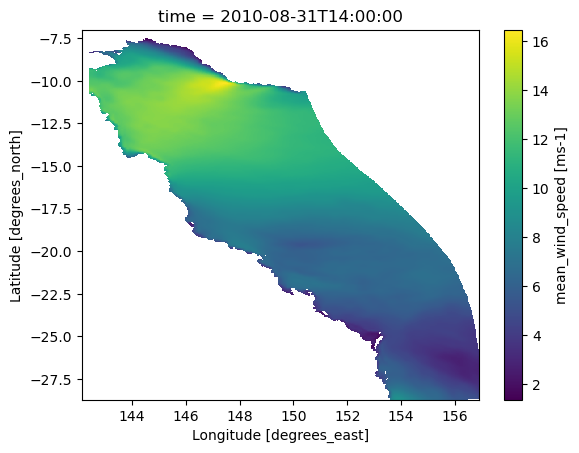

In [38]:
# Plotting mean wind speed for the first time step in the all GBR area
data.mean_wspeed.isel(time=0).plot()

Below, we select the latest date of another variable `wspeed_u`. We could easily access the latest date of a variable by `isel(time=-1)`. 

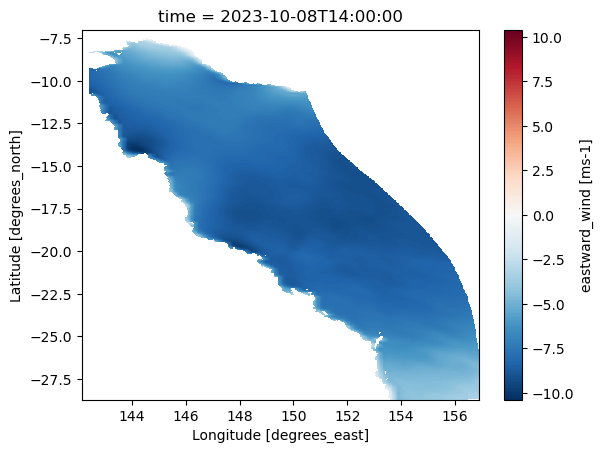

In [39]:
data.wspeed_u.isel(time=-1).plot()

Below, we will select the last time step of the `mean_cur` (mean current speed) on the sea bottom, and plot a map using the `plot` method.

Here, we also use `sel()` function, which is using tick labels along the specified dimension(s). This function is quite similar to the `WHERE` of SQL.

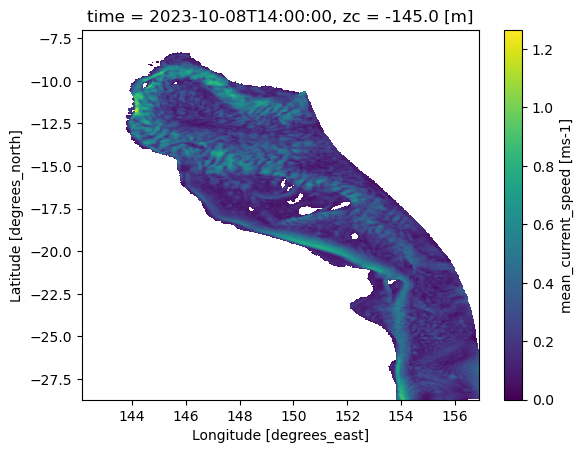

In [40]:
data.mean_cur.isel(time=-1).sel(k=0).plot()

Below, we will extract the `temp` variable from "2022-01-01" to "2022-12-31" on a location and plot a map.

Here, we use the `method=""  ` of `sel()`, which is an optional method to use for inexact matches. We could have a list of choice: `{None, "nearest", "pad", "ffill", "backfill", "bfill"}`. 

Using scenarios of the choices:

- None (default): only exact matches

- pad / ffill: propagate last valid index value forward

- backfill / bfill: propagate next valid index value backward

- nearest: use nearest valid index value

and `slice()` function returns all values inside the range (inclusive), which allows us to select a range of datasets along with a dimension, eg. a time range below.

In [41]:
# If there are no sensor on the given coordinates, the nearest one will be selected
tempTS_2022 = data.sel(latitude=-19.5, longitude=152, method="nearest")\
    .sel(time=slice('2022-01-01', '2022-12-31'))\
    .temp

Below we will select first 10 days temperature with different depth from the sub-dataset of tempTS_2022. 
We use the `plot` method, specify `k` in the `col` argument, which will create a subplot for each `depth` in our data. Finally, we use the `col_wrap` argument to specify the number of columns in our plot.

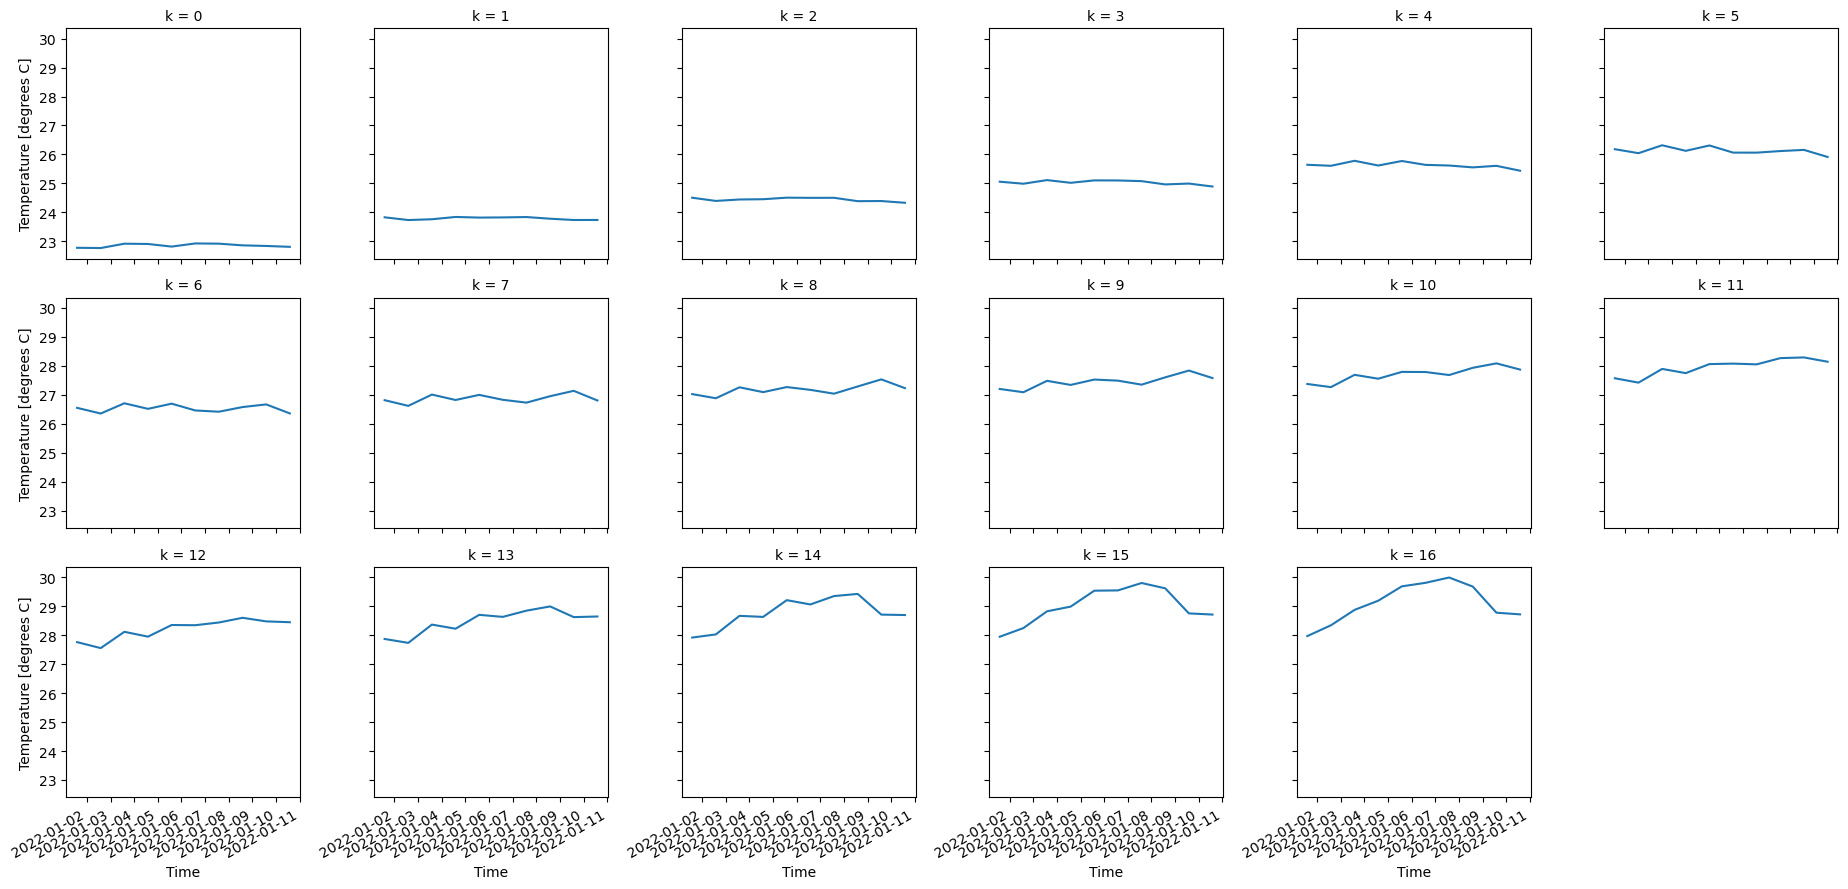

In [42]:
tempTS_2022.isel(time=slice(10)).plot(col="k", col_wrap=6)

We can also select the `salt` or other variable from "2022-01-01" to "2023-01-01" on a location and plot a map.


In [43]:
saltTS_2022 = data.sel(latitude=-20, longitude=152, method="nearest")\
    .sel(time=slice('2022-01-01', '2023-01-01'))\
    .salt

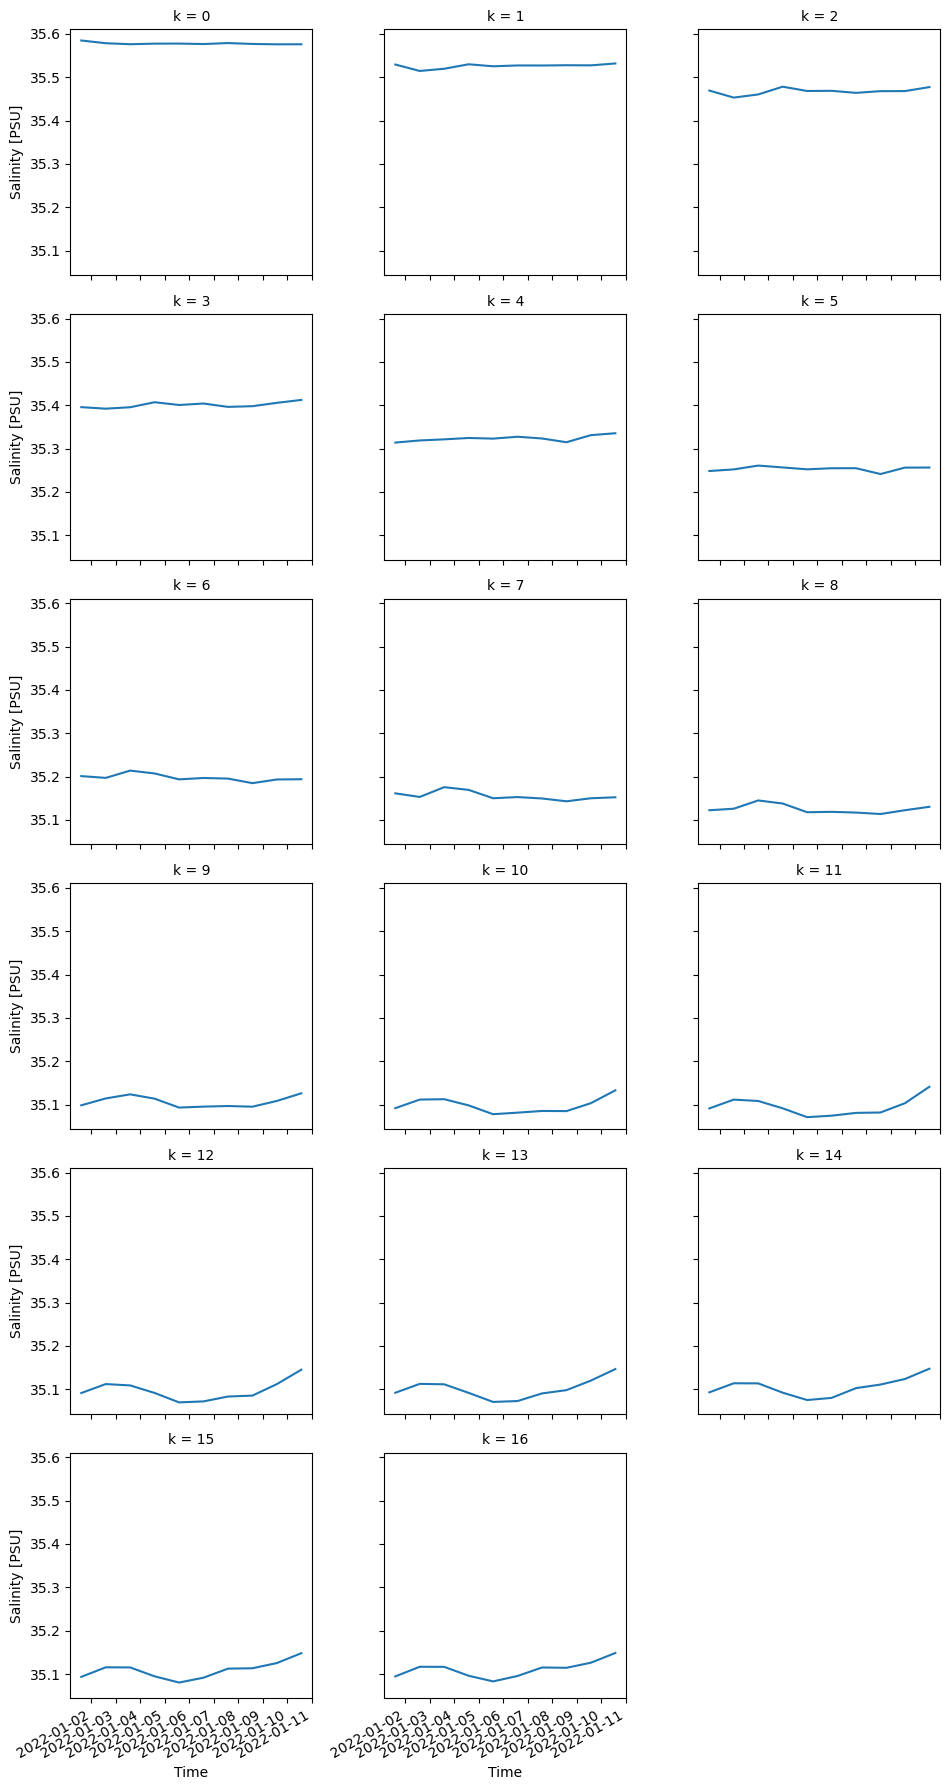

In [44]:
saltTS_2022.isel(time=slice(10)).plot(col="k", col_wrap=3)

## 3. Simple calculations using the entire grid
Below, we will create a new variable that will contain the `temp` data for 2022. We will then calulate a monthly mean and finally we will plot the results.

In [45]:
# Subsetting data
temp_2022 = data.temp.sel(time="2022")

# Checking result
temp_2022

<xarray.DataArray 'temp' (time: 365, k: 17, latitude: 723, longitude: 491)>
[2202731565 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude  (longitude) float64 142.2 142.2 142.2 142.3 ... 156.8 156.8 156.9
  * time       (time) datetime64[ns] 2022-01-01T14:00:00 ... 2022-12-31T14:00:00
    zc         (k) float64 ...
Dimensions without coordinates: k
Attributes:
    aggregation:            Daily
    long_name:              Temperature
    medium_id:              http://environment.data.gov.au/def/feature/ocean
    puv__parameter:         https://vocab.nerc.ac.uk/collection/P01/current/T...
    scaledQuantityKind_id:  http://environment.data.gov.au/def/property/sea_w...
    short_name:             temp
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degrees C

We can now group our 2022 data per calendar month and calculate the monthly mean.

In [46]:
# Calculating monthly means
temp_monthly_2022 = temp_2022.groupby("time.month").mean()

# Checking results
temp_monthly_2022

<xarray.DataArray 'temp' (month: 12, k: 17, latitude: 723, longitude: 491)>
array([[[[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ..., 19.23143 , 19.228935,
          19.217936],
         [      nan,       nan,       nan, ..., 19.219215, 19.224407,
          19.191824],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ..., 19.755375, 19.752344,
          19.739822],
         [      nan,       nan,       nan, ..., 19.745625, 19.747873,
          19.714113],
...
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ..., 22.89508 , 22.895288,
          22.894762],
         [      nan,       nan,       nan, ..., 22.902071, 22.89537 ,
          22.898825],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 -28.7 -28.67 -28.64 ... -7.096 -7.066 -7.036
  * longitude  (longitude) float64 142.2 142.2 142.2 142.3 ... 156.8 156.8 156.9
    zc         (k) float64 ...
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: k
Attributes:
    aggregation:            Daily
    long_name:              Temperature
    medium_id:              http://environment.data.gov.au/def/feature/ocean
    puv__parameter:         https://vocab.nerc.ac.uk/collection/P01/current/T...
    scaledQuantityKind_id:  http://environment.data.gov.au/def/property/sea_w...
    short_name:             temp
    substanceOrTaxon_id:    http://sweet.jpl.nasa.gov/2.2/matrWater.owl#SaltW...
    unit_id:                http://qudt.org/vocab/unit#DegreeCelsius
    units:                  degrees C

Notice how the `time` dimension has been replaced by `month`, which includes 12 time step, one for each month of the year. We can now plot all monthly means for 2022. We use the `plot` method, specify `month` in the `col` argument, which will create a subplot for each month in our data. Finally, we use the `col_wrap` argument to specify the number of columns in our plot.

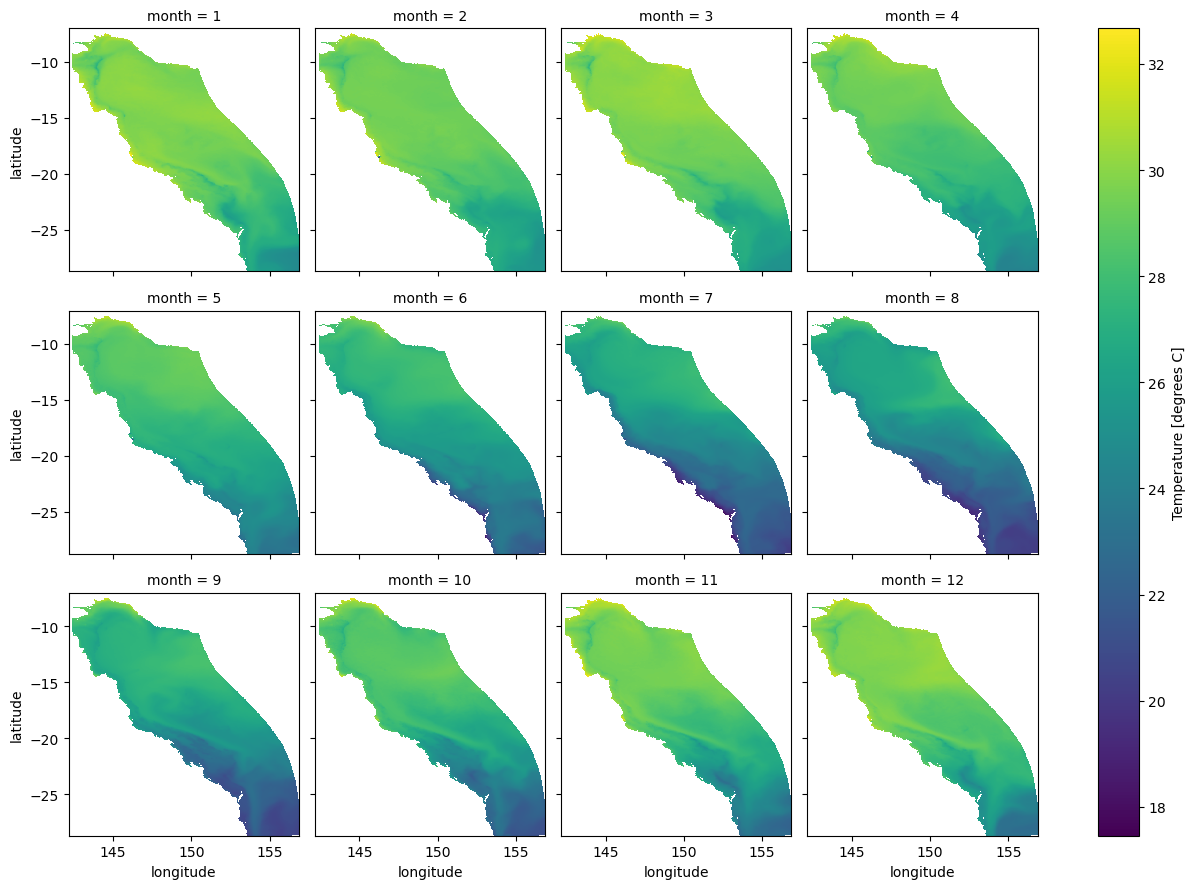

In [47]:
# Plotting monthly means
temp_monthly_2022.sel(k=16).plot(col='month', col_wrap=4)

## 4. Simple calculations at a single point over time
For this example, we will select a single point in the dataset and extract `mean_wspeed` values for a timesteps at that point to plot a time series. We will use the `sel` function to select the point nearest to `latitude` = -20 and `longitude` = 152. We will then subset the data temporally this year, and plot it.  
  
We can do all this in a single line of code as shown below.

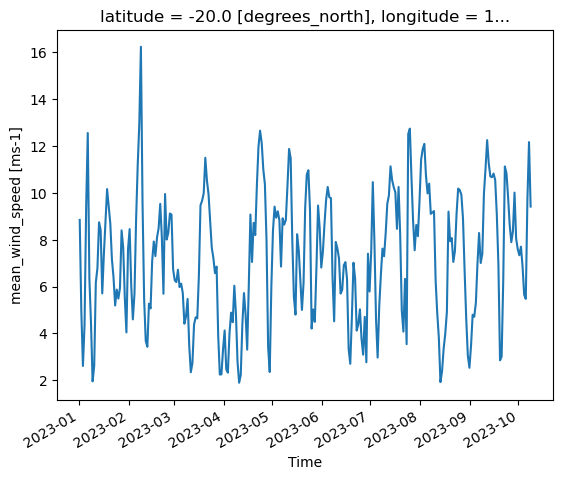

In [48]:
# Plotting the means of wind speed on a location of this year (2023)
data.sel(latitude=-20, longitude=152, method='nearest')\
    .sel(time=slice('2023-01-01', '2023-10-24'))\
    .mean_wspeed.plot()

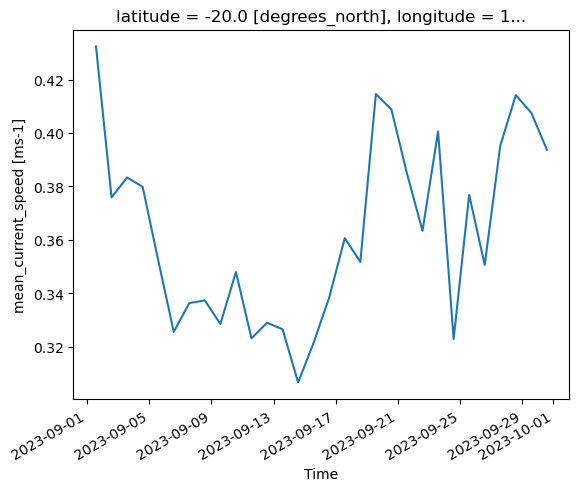

In [49]:
# Plotting the means of current speed on a location of last month (September 2023)
data.sel(latitude=-20, longitude=152, method='nearest')\
    .sel(time=slice('2023-09-01', '2023-09-30'), k=0)\
    .mean_cur.plot()

We can also extract `mean_cur` for all GBR area. Let's take the first week of this month as example.

In [50]:
# Extracting the mean of current speed on sea bottom for all GBR area for the first week of October 2023
mean_current_20231007 = data.sel(time=slice('2023-10-01', '2023-10-07'), k=0).mean_cur

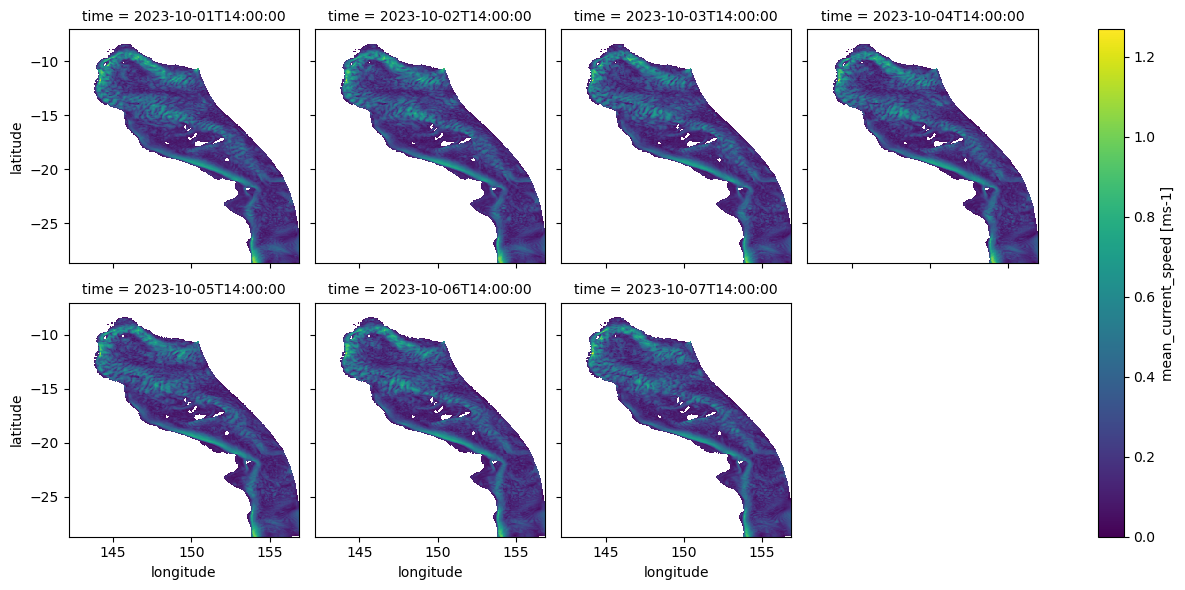

In [51]:
# Plotting the subset
mean_current_20231007.plot(col='time', col_wrap=4)

#### We can easily get any sub-dataset we want by using `sel()` method from the clean consistent ZARR dataset. 
## 5. Finally, save sub-dataset as CSV with one line code

In [52]:
mean_current_20231007.to_dataframe().to_csv("eReef_mean_current_20231007.csv")